<a href="https://colab.research.google.com/github/simonsanvil/ECG-classification-MLH/blob/master/notebook/simon_initial_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common imports 
import os
import numpy as np
import pandas as pd
#to unzip files: with ZipFile('sampleDir.zip', 'r') as zipObj: zipObj.extractall('temp')
import zipfile as zp
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Personal handy python tools
!pip install git+https://github.com/simonsanvil/pyhandy.git

# Tool to plot subaxes from iterables
!pip install git+https://github.com/simonsanvil/subplotted.git

from pyhandy.datautils import get_data_summary
from pyhandy.utils import get_logger_with_format
from subplotted import subplotted

  Cloning https://github.com/simonsanvil/pyhandy.git to /tmp/pip-req-build-5if2ymqh
  Running command git clone -q https://github.com/simonsanvil/pyhandy.git /tmp/pip-req-build-5if2ymqh
  Cloning https://github.com/simonsanvil/subplotted.git to /tmp/pip-req-build-oeq9qm1b
  Running command git clone -q https://github.com/simonsanvil/subplotted.git /tmp/pip-req-build-oeq9qm1b


In [ ]:
#gdown is useful to download files from public files in Google Drive. --id is the id of the file
!gdown --id 1j7Yk0-W9uonQiyyG2B9ZAw5jjZA-UeMS

Downloading...
From: https://drive.google.com/uc?id=1j7Yk0-W9uonQiyyG2B9ZAw5jjZA-UeMS
To: /content/challenge2017.pkl
100% 167M/167M [00:00<00:00, 193MB/s]


In [ ]:
import pickle
data_dict = pickle.load(open("challenge2017.pkl","rb"))

In [ ]:
data = data_dict["data"]
labels = data_dict['label']
df = pd.DataFrame(data,columns=["ts"])\
      .assign(label = pd.Series(labels).replace({"N":"Normal","A":"Atrial Fibrillation","O":"Other Rhythm","~":"Noise"}))
df

,ts,label
0,"[-127, -162, -197, -229, -245, -254, -261, -26...",Normal
1,"[128, 157, 189, 226, 250, 257, 262, 265, 268, ...",Normal
2,"[56, 73, 85, 93, 100, 107, 113, 117, 118, 117,...",Normal
3,"[519, 619, 723, 827, 914, 956, 955, 934, 920, ...",Atrial Fibrillation
4,"[-188, -239, -274, -316, -356, -374, -380, -38...",Atrial Fibrillation
...,...,...
8523,"[-104, -127, -144, -154, -160, -164, -168, -17...",Normal
8524,"[-121, -197, -288, -390, -496, -600, -693, -77...",Other Rhythm
8525,"[-202, -235, -272, -305, -325, -339, -344, -34...",Normal
8526,"[-227, -297, -374, -449, -505, -527, -539, -54...",Normal


In [ ]:
df.label.value_counts()

Normal                 5076
Other Rhythm           2415
Atrial Fibrillation     758
Noise                   279
Name: label, dtype: int64

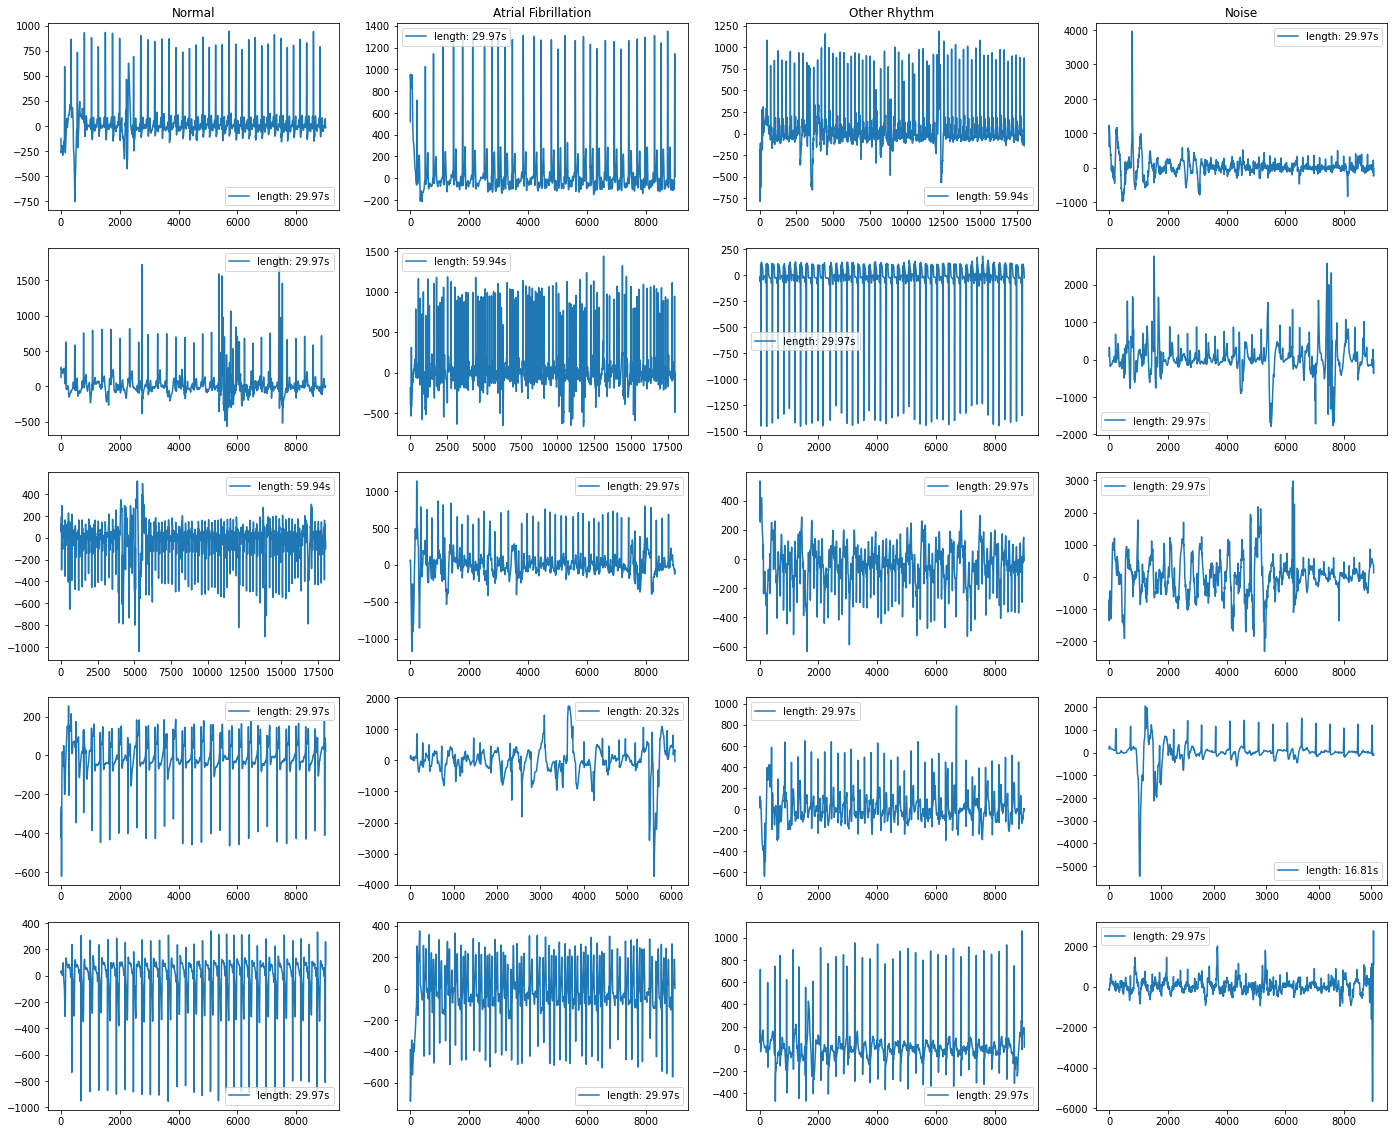

In [ ]:
iter = enumerate(df.label.unique().tolist()*5)
for S,ax,(i,label) in subplotted(iter,ncols=len(df.label.unique()),figsize=(24,20)):
  x = df[df.label==label].iloc[i//len(df.label.unique()),0]
  ax.plot(x,label=f"length: {len(x)*0.00333:.2f}s")
  ax.legend()
else:
  S.set_all(indices=[0,1,2,3],title=lambda i: df.label.unique()[i])

In [ ]:
!pip install "sktime>=v0.8.1"

In [ ]:
from sktime.transformations.panel.rocket import Rocket
from sktime.transformations.panel.shapelets import ContractedShapeletTransform

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifierCV

X_train, X_test, y_train, y_test = train_test_split(df[['ts']],df['label'])

In [ ]:
rocket = Rocket()
rocket.fit(X_train)
X_train_tr = rocket.transform(X_train)

ValueError: ignored